# Week_06

In [2]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [3]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples=modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [4]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    for word in brown.words(categories=genre)
        if word.lower() == modals # candidate
)

cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


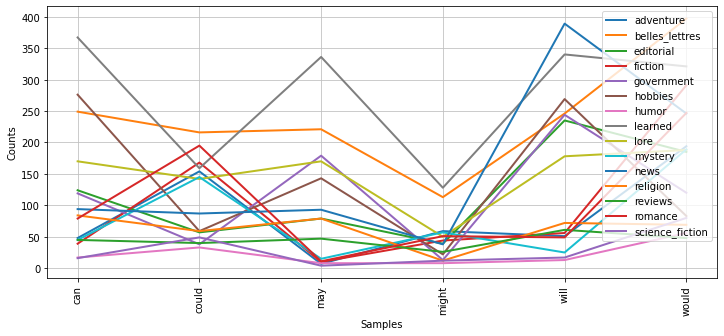

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
cfd2.plot()

### Inaugural
- 연설문 데이터

In [6]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [7]:
inaugural = nltk.corpus.inaugural

In [8]:
inaugural.fileids()[:7] #연도 - 이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt']

In [9]:
# inaugural 에서 america, citizen의 빈도수, 연도별로


cfd3 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) #fileid에서 .txt제거하기
    #작성하기
    for fileid in inaugural.fileids()
    for target_word in ['democracy', 'vote']
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word) # candidate
)

cfd3.tabulate()

              1797-Adams     1825-Adams  1841-Harrison  1857-Buchanan     1877-Hayes  1881-Garfield 1885-Cleveland  1889-Harrison 1893-Cleveland  1897-McKinley      1909-Taft   1921-Harding    1929-Hoover 1933-Roosevelt 1937-Roosevelt 1941-Roosevelt 1945-Roosevelt    1949-Truman   1961-Kennedy   1965-Johnson    1985-Reagan      1989-Bush   1993-Clinton   1997-Clinton      2001-Bush      2005-Bush     2013-Obama     2021-Biden 
democracy              0              1              4              0              0              0              0              0              0              0              0              4              1              1              8              9              2              9              0              1              2              5              4              4              2              1              2             11 
     vote              1              0              3              1              1              5              1              1         

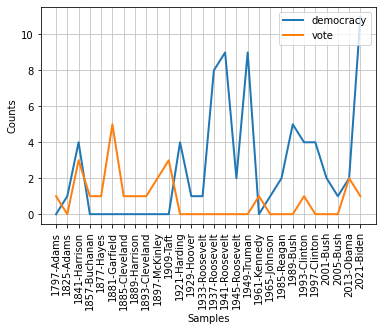

In [10]:
cfd3.plot()

## Tuple & List

1. 생성하기
- 요소가 1개 일 때
- 요소가 2개 이상일 때

2. 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    -리스트, 튜플 자체가 a = {1,2,3,4}
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것, 그것을 가각의 변수로 변환하는 것
    -a,b,c = [1,2,3]
  
3. 연산
- 덧겜, 곱셉, 비교 모두 가능

4. 순회하기

5. list comprehension
- 튜플(x)

6. 튜플은 불변 객체이다.
- a = 1, 2, 3, 4
- 코드 수정할 때 튜플 수정할 수 없게 하는 용도로 사용함.
- key 값을 저장
  ex) blue = 1 white = 2

7. 형 변환 
- tuple()
- ()


In [11]:
# 요소 1개
TT = ()
TT = tuple()

LL = []
LL = list()

TT,LL

((), [])

2. 요소 두 개 이상

In [12]:

listA =['a', 'b']

tupleA = 'a', 'b' # 가능
tupleB =('a','b')

tupleA, tupleB, listA

(('a', 'b'), ('a', 'b'), ['a', 'b'])

2. 여러 변수 할당하기

In [13]:
name = 'KIM'
a, b, c = name
a, b, c # unpacking

('K', 'I', 'M')

In [14]:
# 값 교환
hobby = 'bowling'
food = 'sushi'

# hobby = 'sushi', food = 'bowling' 교환
temp1 = hobby
temp2 = food
hobby = temp2
food = temp1

hobby, food # 



('sushi', 'bowling')

In [15]:
hobby, food = food, hobby #다시 교환

hobby, food

('bowling', 'sushi')

3. 연산

In [16]:
('c',) + ('a', 't') # 덧셈 가능

('c', 'a', 't')

In [17]:
('a', 't') * 4 # 곱셈 가능

('a', 't', 'a', 't', 'a', 't', 'a', 't')

In [18]:
a = 2,9
b = 3,1

a <b # 비교 가능

True

In [19]:
a,b

((2, 9), (3, 1))

4. 순회하기

In [20]:
x = 3,6,9
for i in x:
    print(x)

(3, 6, 9)
(3, 6, 9)
(3, 6, 9)


5. list comprehension
- tuple?(x)


In [21]:
# 튜플 사용 1번 <= 제일 빠름
tuple([word for word in x])

(3, 6, 9)

In [29]:
# 2번
*[word for word in x],

(3, 6, 9)

6. 튜플은 불변 객체이다.
- a = 1, 2, 3, 4
- 코드 수정할 때 튜플 수정할 수 없게 하는 용도로 사용함.
- key 값을 저장

blue = 1
white = 2


In [35]:
a = (3,)
b = (3, 6, 9)
id(a), id(b), id(a+b)

(139890299580176, 139890299742400, 139890300305584)

7. 형 변환
- tuple()
- ()

In [36]:
tuple('cat'),['cat'] #앞에는 하나하나 따로 뒤에는 전체가 하나

(('c', 'a', 't'), ['cat'])

튜플의 장점:
- 타인이 변경하는 걸 막을 수 있다. **
- 메모리 사용 적다.

리스트 장점:
- 데이터 순차적으로 파악하기 좋다

List 관련 함수

1. 항복 변경하기

In [37]:
days = ['월', '화', '수', '목']

# '금' 추가
days.append('금') # 마지막에 요소 추가

In [38]:
days

['월', '화', '수', '목', '금']

In [39]:
days.insert(2,'토') # offset 지정 가능
days

['월', '화', '토', '수', '목', '금']

In [40]:
# 병합하기
listA = ['Sat','Sud']
days.extend(listA)
days

['월', '화', '토', '수', '목', '금', 'Sat', 'Sud']

In [41]:
# extend 와 append 차이 - append 는 리스트 전체로 들어감
days.append(listA)
days

In [45]:
days += listA
days

['월',
 '화',
 '토',
 '수',
 '목',
 '금',
 'Sat',
 'Sud',
 ['Sat', 'Sud'],
 'Sat',
 'Sud',
 'Sat',
 'Sud']

In [46]:
# offset
days [-3] = '공휴일'
days

['월',
 '화',
 '토',
 '수',
 '목',
 '금',
 'Sat',
 'Sud',
 ['Sat', 'Sud'],
 'Sat',
 '공휴일',
 'Sat',
 'Sud']

In [47]:
days[:3]='doby' #개수 달라도 상관 없음
days

['d',
 'o',
 'b',
 'y',
 '수',
 '목',
 '금',
 'Sat',
 'Sud',
 ['Sat', 'Sud'],
 'Sat',
 '공휴일',
 'Sat',
 'Sud']

In [48]:
#a = 3, 4, 5, 6
a = list(range(3,7))
a

[3, 4, 5, 6]

삭제하기


In [49]:
#1. offset
del days[0] # 자리가 보존되지 않고 아이템이 하나씩 앞당겨짐
days

['o',
 'b',
 'y',
 '수',
 '목',
 '금',
 'Sat',
 'Sud',
 ['Sat', 'Sud'],
 'Sat',
 '공휴일',
 'Sat',
 'Sud']

In [51]:
#2. 특정한 값 삭제
days.remove('Sat') #0번째만 삭제
days

['o', 'b', 'y', '수', '목', '금', 'Sud', ['Sat', 'Sud'], '공휴일', 'Sat', 'Sud']

In [52]:
#3. pop(index) default= -1 맨 마지막 요소를 삭제
days.pop(0)

'o'

In [53]:
days

['b', 'y', '수', '목', '금', 'Sud', ['Sat', 'Sud'], '공휴일', 'Sat', 'Sud']

In [55]:
# clear - 다 지우기
days.clear()
days

[]

#### 값 찾기

In [59]:
a = list(range(7))
a.index(0)

0

In [62]:
# 값 확인
6 in a

True

In [63]:
7 in a

False

#### 정렬하기
- 리스트.sort(reverse) : 정렬된 뒤 값 변환하지 않고 기존값 변경되어 있음.
- sorted(리스트, reverse) : 정렬된 복사본을 반환, 기존 값은 유지
- 리스트.reverse()
- reversed(리스트)

In [65]:
a

[0, 1, 2, 3, 4, 5, 6]

In [67]:
b = sorted (a, reverse=True)

In [68]:
a, b

([0, 1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1, 0])

In [72]:
b.sort()
b

[0, 1, 2, 3, 4, 5, 6]

In [75]:
b.reverse()
b

[6, 5, 4, 3, 2, 1, 0]

In [76]:
c = list(reversed(b))
c

[0, 1, 2, 3, 4, 5, 6]

#### 할당하기
- =으로 할당할 때에는 하나가 변하면 같이 변함. 메모리 주소를 참조하고 있으므로
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
- deep copy

In [77]:
a

[0, 1, 2, 3, 4, 5, 6]

In [78]:
b = a # [0, 1, 2, 3, 4, 5 ,6]에 a, b 가 메모리 주소 참조
b[0] = 7
b

[7, 1, 2, 3, 4, 5, 6]

In [79]:
a # a도 같이 바뀜

[7, 1, 2, 3, 4, 5, 6]

In [80]:
id(a), id(b) # id가 같음

(139890299094032, 139890299094032)

In [83]:
# shallow
b = a.copy()
c= list(a)
d = a[:]
a, b, c, d

([7, 1, 2, 3, 4, 5, 6],
 [7, 1, 2, 3, 4, 5, 6],
 [7, 1, 2, 3, 4, 5, 6],
 [7, 1, 2, 3, 4, 5, 6])

In [84]:
id(a), id(b), id(c), id(d) # id 다 다름

(139890299094032, 139890299010016, 139890299309824, 139890298514400)

In [85]:
e = a.copy()
e

[7, 1, 2, 3, 4, 5, 6]

In [86]:
del a[0]
a, e

([1, 2, 3, 4, 5, 6], [7, 1, 2, 3, 4, 5, 6])

In [89]:
a.append([3,6,9])

In [90]:
import copy
f = copy.deepcopy(a)
f

[1, 2, 3, 4, 5, 6, [3, 6, 9]]

In [91]:
f[-1][-1] = 8
a, f

([1, 2, 3, 4, 5, 6, [3, 6, 9]], [1, 2, 3, 4, 5, 6, [3, 6, 8]])

#### 순회하기
- zip() : 여러개 리스트를 동시 순회
- enumerate() : 인덱스도 함께 돌고자 할 때 (list, range)
- range()

In [92]:
a = [1, 2, 3]
b = ['1st', '2nd', '3rd', '4th']

for itemA, itemB in zip(a,b): # 아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, '1st')
(2, '2nd')
(3, '3rd')


In [93]:
list(zip(a,b))

[(1, '1st'), (2, '2nd'), (3, '3rd')]

In [95]:
for idx, itemA in enumerate(b):
    print((idx,itemA))

(0, '1st')
(1, '2nd')
(2, '3rd')
(3, '4th')


### 리스트 컴프리헨션

In [99]:
[(num, rank) for num, rank in zip(a,b)]

[(1, '1st'), (2, '2nd'), (3, '3rd')]

#### 연습
- 리스트 -> for문으로
  - for 문을 사용하여 구현

In [100]:
#for -> 리스트
result = []
for num, rank in zip(a,b):
    result.append((num, rank))

result

[(1, '1st'), (2, '2nd'), (3, '3rd')]

In [101]:
# for rank in b
    # for num in a
[(num, rank) for num in a for rank in b]

[(1, '1st'),
 (1, '2nd'),
 (1, '3rd'),
 (1, '4th'),
 (2, '1st'),
 (2, '2nd'),
 (2, '3rd'),
 (2, '4th'),
 (3, '1st'),
 (3, '2nd'),
 (3, '3rd'),
 (3, '4th')]

In [104]:
# 문제 1. (대문자, 타이틀, 글자수)로 저장된 리스트로 만들어라.
sentence = "I dont't judge a book by its cover"
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('I', 'I', 1),
 ("DONT'T", "Dont'T", 6),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [105]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]
# 2.1. 문장으로 구성된 리스트로 만들기 
      # ['hello guys', 'how are you']
# 2.2. 전체 단어를 하나의 리스트로 가져오기
      # ['','','']
# 2.3. 전체를 스트링으로 가져오기
      # 'hello guys how are you'

In [106]:
#1
[' '.join(sent) for sent in text]

['hello guys', 'how are you']

In [107]:
for sent in text:
    for word in sent:
        print(word)

hello
guys
how
are
you


In [108]:
#2
[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [109]:
' '.join([word for sent in text for word in sent])

'hello guys how are you'